In [1]:
import os

import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# Genera colormap para agua y tierra
c_agua=plt.cm.Blues_r(np.linspace(0,0.75,256))
c_terr=plt.cm.gist_earth(np.linspace(0.5,1,256))
cols = np.vstack((c_agua, c_terr))
terreno=cm.colors.LinearSegmentedColormap.from_list("terreno", cols)

In [3]:
def espaciamiento_grd(grd_data):
    dx=np.diff(grd_data.x.values)[0]*3600
    dy=np.diff(grd_data.y.values)[0]*3600
    return dx,dy

In [33]:
# Cargar batimetría
grd_file=r"G:\My Drive\UTFSM\memoria\tareas\tarea03\batis\config02\bat_l3_quin2valp_conf1.grd"
save_name="ts_valp"

grd_data=xr.open_dataset(grd_file)

with grd_data as ds:
  print(ds.keys())

print()
print('Espaciamiento [sa]: ',np.array(espaciamiento_grd(grd_data)))

KeysView(<xarray.Dataset>
Dimensions:  (x: 952, y: 992)
Coordinates:
  * x        (x) float64 288.2 288.2 288.2 288.2 ... 288.7 288.7 288.7 288.7
  * y        (y) float64 -33.17 -33.17 -33.17 -33.17 ... -32.65 -32.65 -32.65
Data variables:
    z        (y, x) float64 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        bat_l3_quin2valp_conf1.grd
    history:      File written by MATLAB function grdwrite2.m
    description:  Created 15-May-2018 11:14:38
    GMT_version:  4.x)

Espaciamiento [sa]:  [1.875 1.875]


In [34]:
# Dejar como listas en blanco si no se usará alguna de estas variables.
# Ejemplo: archivo_xy=[] o coords_mareografo=[]

# Ubicacion archivo ts_location.xy
archivo_xy=[
    
]

# Coordenadas mareografo(s), ejemplo: [[x1,y1,"nombre1"],[x2,y2,"nombre2"],...]
coords_mareografos=[
    [288.3741,-33.0273,"valp"]
]

In [55]:
# Genera grilla de boyas equiespaciadas en dx y dy
# (Espaciamiento en grados)

# Definir limites en x, y de las boyas y espaciamiento dx, dy
xmin,xmax=288.38,288.5
ymin,ymax=-33.05,-32.9

dx=0.05
dy=0.05

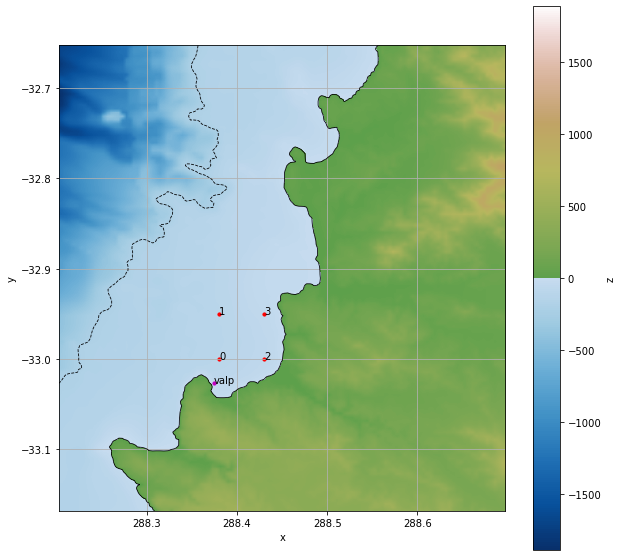

ts_valp
5
288.38	-33.0	#000
288.38	-32.95	#001
288.43	-33.0	#002
288.43	-32.95	#003
288.3741	-33.0273	#valp


In [56]:
fig1,ax1=plt.subplots(figsize=(10,10))

lineas=[] #lineas del archivo.xy

# Genera grilla y plotea
lista_x=(np.arange(xmin,xmax,dx))
lista_y=(np.arange(ymin,ymax,dy))

cont=0
for xi in lista_x:
    for yi in lista_y:
        # Prof de las boyas:
        zi=grd_data.z.sel(x=xi,y=yi,method="nearest").values.item()
        # Filtra las boyas en tierra
        if zi<=0:
            # n lon lat z
            lineas.append("\t".join(str(i) for i in [round(xi,4),round(yi,4)
                                                     ,"#"+str(cont).zfill(3)]
                                   )
                         )
            ax1.scatter(xi,yi,s=10,color='r')
            ax1.annotate(cont,xy=(xi,yi))
            cont=cont+1
            
# Plotea bati y curvas de nivel
grd_data.z.plot.imshow(ax=ax1, cmap=terreno)
grd_data.z.plot.contour(levels=[-200, 0],colors='k',linewidths=0.8, ax=ax1)


# Plotea boyas del archivo.xy o coordenadas del mareografo si existen
if coords_mareografos!=[]:
    for lonlat in coords_mareografos:
        cont=cont+1
        ax1.scatter(lonlat[0],lonlat[1],s=10,color='m')
        ax1.annotate(lonlat[2],xy=(lonlat[0],lonlat[1]))
        lineas.append(
            "\t".join(str(i) for i in [lonlat[0],lonlat[1],"#"+lonlat[2]])
        )

ax1.set_aspect('equal')
plt.grid()
plt.show()

print(save_name)
lineas.insert(0,str(cont))
for linea in lineas:
    print(linea)

In [57]:
# Guarda .xy e imagen 
save_folder=r"G:\My Drive\UTFSM\memoria\tareas\tarea03\boyas"

with open(os.path.join(save_folder,save_name+".xy"), 'w', newline='\n') as writer:
    for linea in lineas:
        writer.write(linea+'\n')

fig1.savefig(os.path.join(save_folder,save_name+".png"),dpi=300,bbox_inches = 'tight')